<a href="https://colab.research.google.com/github/Margo-s-M/AI_Colab/blob/main/%D0%A1%D1%89%D0%B1%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [149]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df = df.select_dtypes('number')

In [150]:
df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


<Axes: >

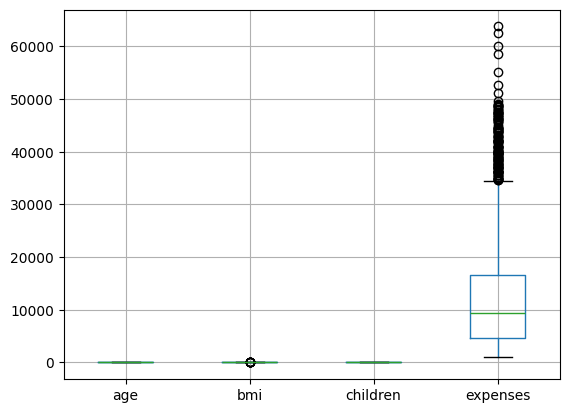

In [151]:
df.boxplot()

багато викедів в витратах варто чистити ?

# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [152]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [153]:
df.isnull().sum()

,0
age,0
bmi,0
children,0
expenses,0


In [154]:
df.dtypes

,0
age,int64
bmi,float64
children,int64
expenses,float64


**Завдання 2**
Розділіть дані на залежну y(expenses) та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [155]:
X = df[['age','bmi','children']]
y = df['expenses']

In [156]:
X.shape

(1338, 3)

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [158]:
X_test.shape

(268, 3)

In [159]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

In [160]:
model.fit(X_train, y_train)

LinearRegression()

**Завдання 3**
Натренуйте LinearRegression та виведіть такі метрики: MAE, RMSE, R2

In [161]:
y_pred = model.predict(X_train)

In [162]:
from sklearn import metrics
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [163]:
res_ex =pd.DataFrame()
res_ex ['X_train'] = get_metrics(y_train,y_pred)


In [164]:
res_ex

,X_train
MAE,9005.73
RMSE,11334.22
R2,0.11


# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [187]:
#Y=aX+b  expenses_Y =cefage+crossing
#На жаль , Я не виконала завдання, оскільки неправильно його зрозуміла .   Потрібна допоиога або підказка. Дякую

# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат. Розгляньте один з варіантів:
* видалення викидів по стовпчику `expenses`
* видалення викидів по всіх стовпчиків

In [173]:
def remove_outliers(df,column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 3*iqr
  upper = q3 + 3*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]


In [189]:
expenses_clean = remove_outliers(df,'expenses')
expenses_clean

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [190]:
df2 = df.copy()
for column_name in df2.columns:
  if df2.dtypes[column_name] in ('object' , 'datatime64[ns]'):
    continue

  df2 = remove_outliers(df, column_name)


<Axes: >

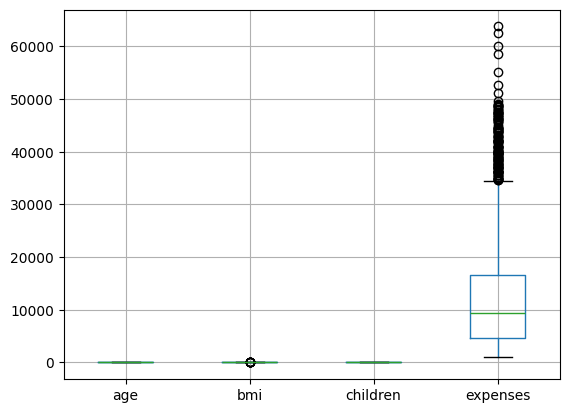

In [184]:
df.boxplot()

<Axes: >

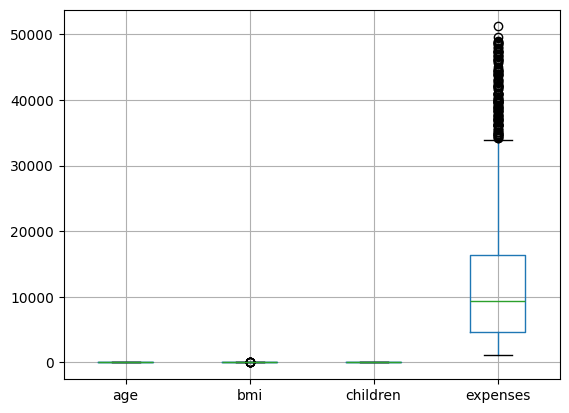

In [191]:
df2.boxplot()